<a href="https://colab.research.google.com/github/rncebranco/ufpa_ficcd_2025/blob/main/FICCD_Claudomiro_ativ_2_1_Lin_regression_and_metrics_Raimunda_Branco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Fundamentos de Inteligência Computacional e Ciência de Dados**

**Professor: Claudomiro Sales**

**Aluna: Raimunda Branco - 202499980055**

**[Atividade 2.1 - Linear regression and metrics](https://docs.google.com/presentation/d/1obE6ABYli11elIhCNlCAbqi5NalK6gogtNxelPgIK-4/edit?pli=1&slide=id.g34bdefd0b8b_0_0#slide=id.g34bdefd0b8b_0_0)**

**Belém, 23 de maio de 2025.**

#####**A)** Com o mesmo dataset da Atividade 2, faça boxplots de duas features do dataset, conforme procedimento mostrado em sala. Para cada boxplot calcule:
* CV
* Curtose
* Skewness
* Mean
* Moda

Analise os resultados.

Para um desses boxplots, introduza artificialmente outliers e verifique o que ocorre com o boxplot e essas métricas.

Contexto do **[Dataset](https://www.kaggle.com/datasets/lauroliveira/enem-2019-dados-tratados/data)**:

Proposta: Análise de dados da Secretaria de Educação.


* Como foi a performance dos alunos em 2019 no Enem?

* Dados reais de todos os inscritos do ENEM de 2019, para entender como os alunos performaram e extrair informações e insights tal que a Secretária de Educação possa agir e aconselhar as escolas na metodologia ou no foco do ensino.

* A Secretaria selecionou algumas informações (classes e features) que julgou reviamente como mais importantes.

* Os dados em csv estão tratados e possuem mais de 5 milhões de linhas e 21 colunas ao todo.

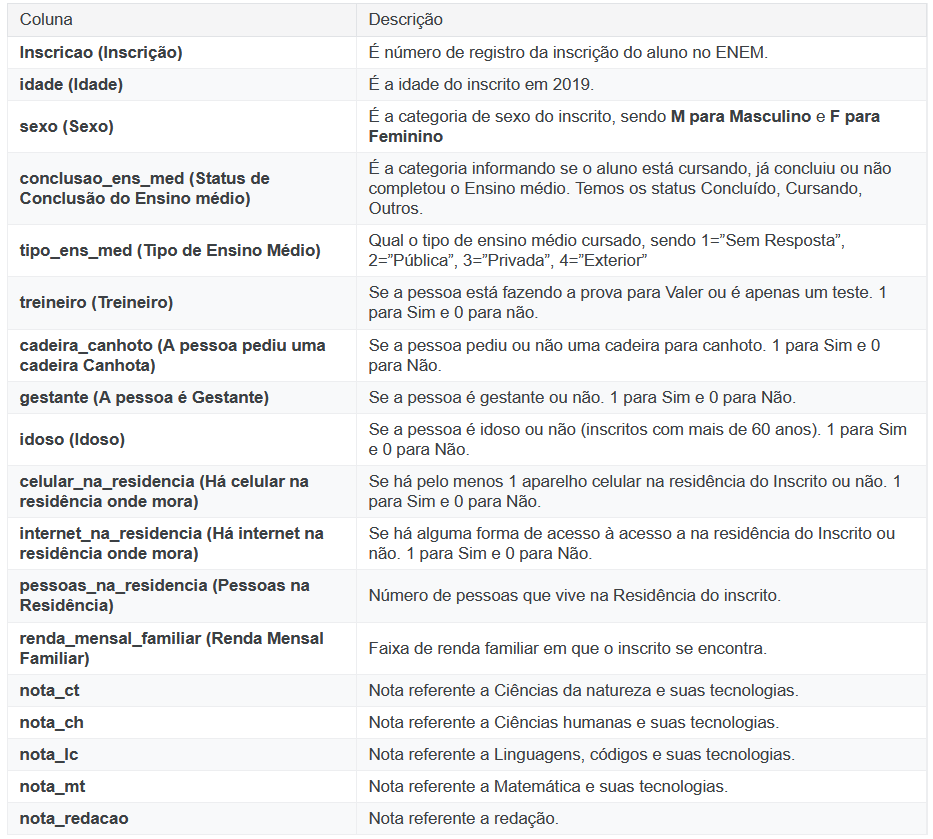

In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import kagglehub as kh
import scipy.stats as stats
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [102]:
# Dataset from Kaggle
path = kh.dataset_download('lauroliveira/enem-2019-dados-tratados')
#print('Path to dataset files:', path)

data = pd.read_csv(path + '/enem_2019.csv')
#data.head()

nota_mt = data['nota_mt'].dropna()
nota_redacao = data['nota_redacao'].dropna()

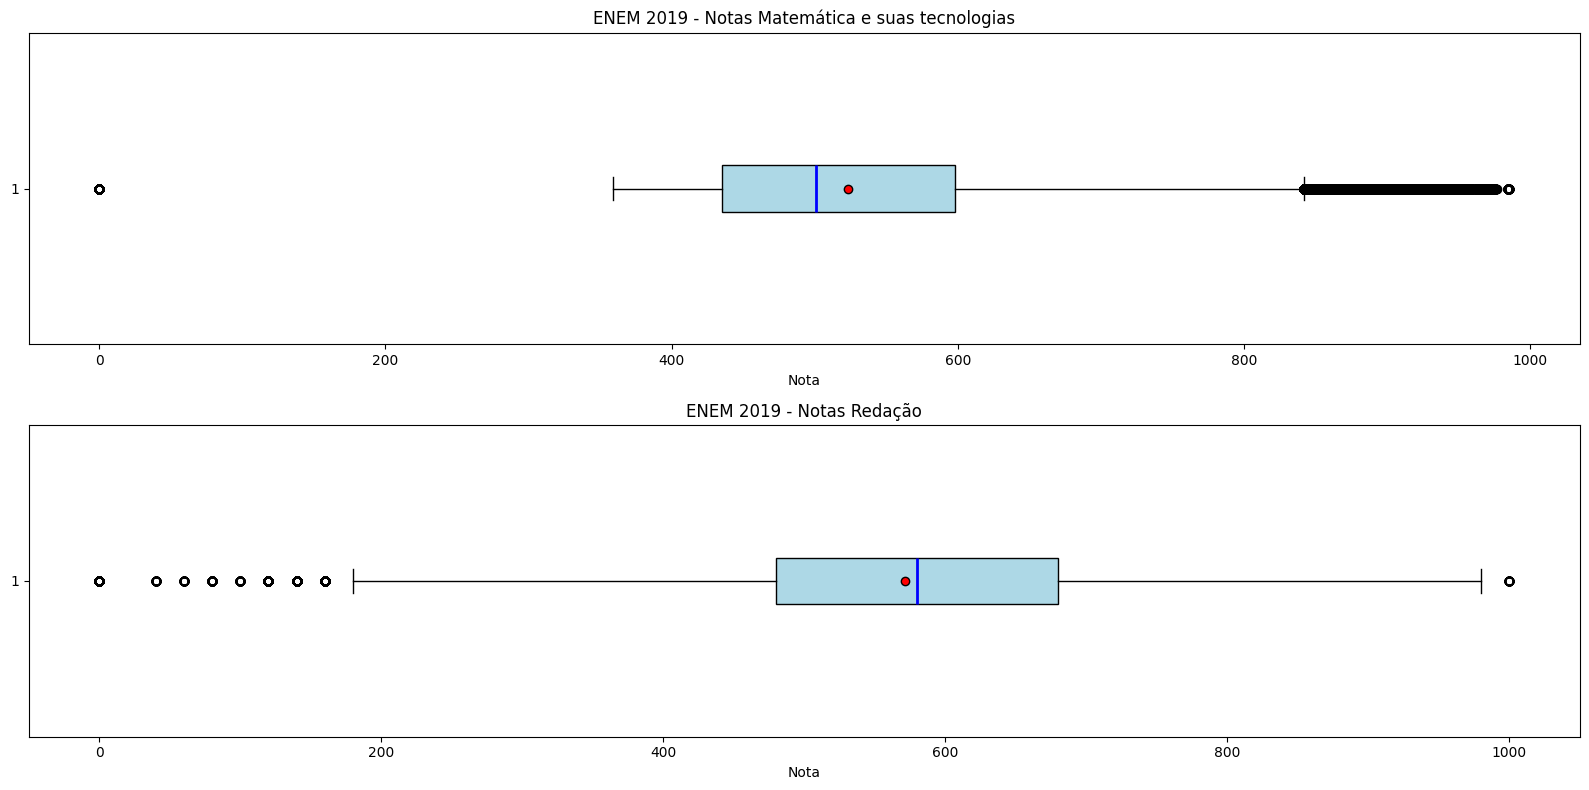

In [104]:
# Boxplots de duas features do dataset:

plt.figure(figsize=(16, 8))

# Notas Matemática e suas tecnologias
plt.subplot(2, 1, 1)
plt.boxplot(nota_mt, vert=False, patch_artist=True, showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"},
            medianprops={"color": "blue", "linewidth": 2},
            boxprops=dict(facecolor="lightblue"))
plt.title("ENEM 2019 - Notas Matemática e suas tecnologias")
plt.xlabel("Nota")

# Notas Redação
plt.subplot(2, 1, 2)
plt.boxplot(nota_redacao, vert=False, patch_artist=True, showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"},
            medianprops={"color": "blue", "linewidth": 2},
            boxprops=dict(facecolor="lightblue"))
plt.title("ENEM 2019 - Notas Redação")
plt.xlabel("Nota")

# Show the plot
plt.tight_layout()
plt.show()

In [106]:
# Para cada boxplot calcule: CV; Curtose; Skewness; Mean; Moda:

# Notas Matemática e suas tecnologias
mean_nota_mt = data['nota_mt'].mean()
median_nota_mt = data['nota_mt'].median()
moda_nota_mt = data['nota_mt'].mode()
std_dev_nota_mt = data['nota_mt'].std(ddof=1)
cv_nota_mt = (std_dev_nota_mt / mean_nota_mt) * 100
kurtosis_nota_mt = data['nota_mt'].kurtosis()
skewness_nota_mt = data['nota_mt'].skew()

print("Matemática e suas tecnologias:")
print(f" - Média: {mean_nota_mt:.2f}")
print(f" - Mediana: {median_nota_mt:.2f}")
print(f" - Moda: {moda_nota_mt[0]:.2f}")
print(f" - Coeficiente de Variação (CV): {cv_nota_mt:.2f}%")
print(f" - Curtose: {kurtosis_nota_mt:.2f}")
print(f" - Skewness: {skewness_nota_mt:.2f}")

# Notas Redação
mean_nota_redacao = data['nota_redacao'].mean()
median_nota_redacao = data['nota_redacao'].median()
moda_nota_redacao = data['nota_redacao'].mode()
std_dev_nota_redacao = data['nota_redacao'].std(ddof=1)
cv_nota_redacao = (std_dev_nota_redacao / mean_nota_redacao) * 100
kurtosis_nota_redacao = data['nota_redacao'].kurtosis()
skewness_nota_redacao = data['nota_redacao'].skew()

print("\nRedação:")
print(f" - Média: {mean_nota_redacao:.2f}")
print(f" - Mediana: {median_nota_redacao:.2f}")
print(f" - Moda: {moda_nota_redacao[0]:.2f}")
print(f" - Coeficiente de Variação (CV): {cv_nota_redacao:.2f}%")
print(f" - Curtose: {kurtosis_nota_redacao:.2f}")
print(f" - Skewness: {skewness_nota_redacao:.2f}")

Matemática e suas tecnologias:
 - Média: 523.12
 - Mediana: 501.10
 - Moda: 446.40
 - Coeficiente de Variação (CV): 20.85%
 - Curtose: -0.04
 - Skewness: 0.69

Redação:
 - Média: 571.19
 - Mediana: 580.00
 - Moda: 600.00
 - Coeficiente de Variação (CV): 33.05%
 - Curtose: 1.45
 - Skewness: -0.71


Análise dos resultados:
* As notas de Matemática demonstraram que a maioria dos alunos analisados tiveram notas abaixo da média. A média de 523,12 demonstra que os candidatos tiveram um desempenho mediano nessa prova. A média é maior que a mediana, com dados estão assimétricos à direita, como pode ser visto no gráfico. A média maior também indica a cauda longa das notas altas influenciando nesse alongamento.
* A moda (nota mais frequente) de Matemática foi 446,60 mostra que muitos candidados tiveram um desempenho não muito bom.
* As notas de Redação possuem média de 571.19, demonstrando um desempenho melhor dos alunos nesta prova comparado à Matemática. A média menor que a mediana (580.00) e também menor que a moda de redação (600) indica a assimetria negativa do lado esquerdo.
* O CV sugere que a dispersão das notas de Matemática (20,85%) é menor que das notas de Redação (33,05%), indicando que as notas de Matemática foram mais homogêneas que as notas de Redação.
* Conforme o resultado e a partir da análise dos graficos, observa-se que em relação à assimetria,as notas de Matemática tiveram um skewness = 0,69, confirmando a assimetria positiva, com cauda longa à direita do gráfico. Ou seja, alunos com notas altas estão puxando a média pra cima. Pode se observar a mediana do lado esquerdo dentro da caixa e bastante outiliers de notas bem altas. Há outliers com nota zero, esse de fato é um ruído, pois não tem como zerar a provas objetivas, somente a Redação. Observa-se então a presença de ruídos.
* As notas de Redação tiveram um skewness = -0,71, confirmando assimetria negativa e cauda longa à esquerda. O gráfico mostra isso a partir da mediana à direita dentro da caixa e outliers próximos de zero, indicando que muitos alunos zeraram a redação e poucos outros tiraram a nota máxima de 1000. Nesse caso, já existe a presença de outliers também.
* Já em relação à curtose, que pode nos indicar a configuração das caudas da distribuição, as notas de Matemática possuem curtose = -0,04 e indicam que a distribuição são próximas às de uma distribuição normal, com picos menores e menor frequência de outliers . A curtose = 1,45 das notas de Redação indica que a distribuição das notas tem um pico mais agudo e caudas maiores, sugere concentração de notas ao redor da média e maior frequência de outliers.

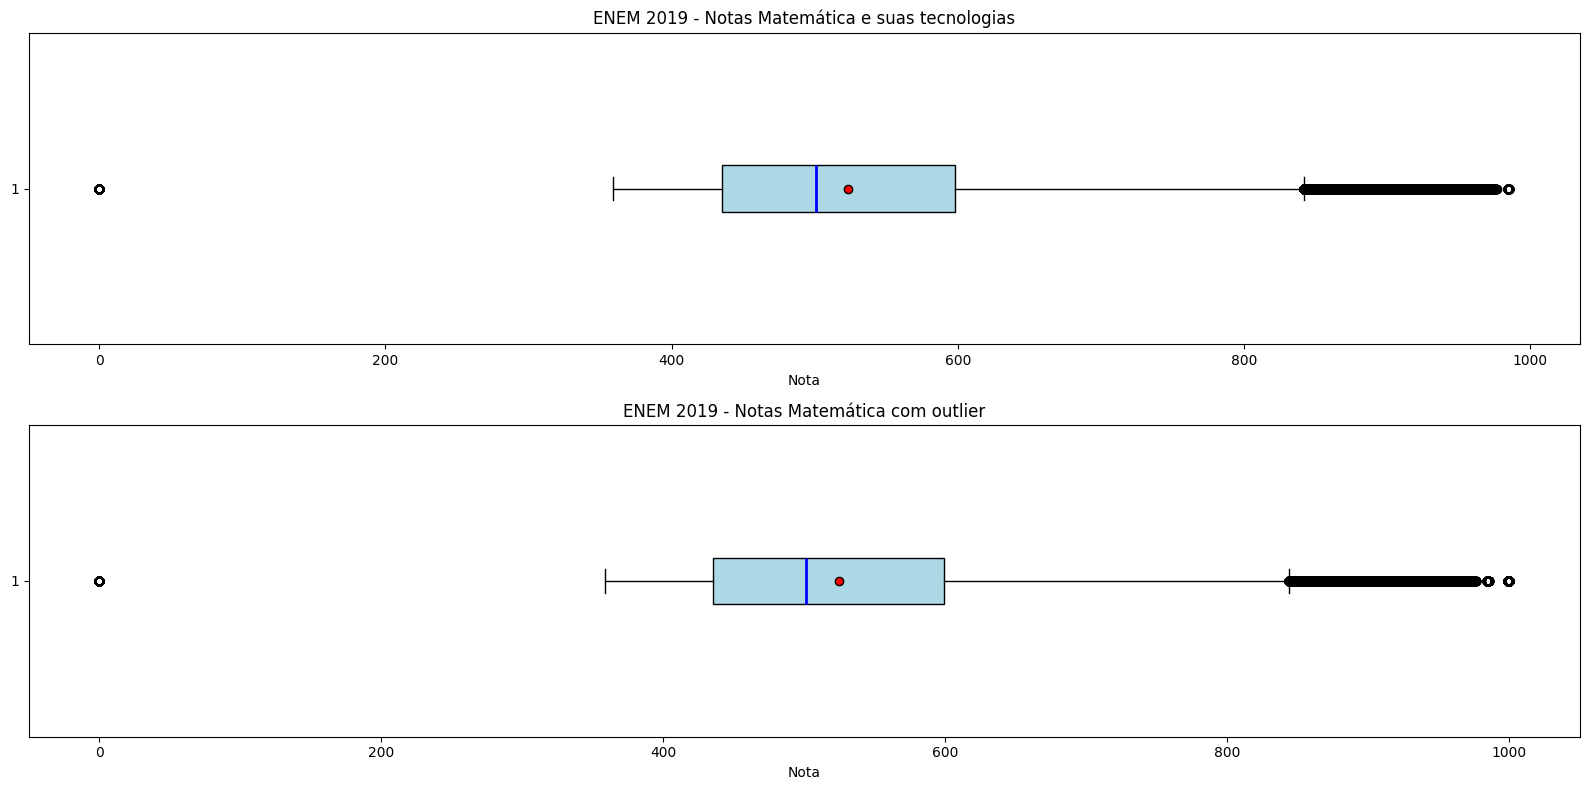

In [107]:
# Introduza artificialmente outliers:

# Inserindo 10.000 outliers
outliers = np.random.uniform(999, 1000, 10000)
data_with_outlier = np.concatenate([nota_mt, outliers])

plt.figure(figsize=(16, 8))

# Notas Matemática e suas tecnologias
plt.subplot(2, 1, 1)
plt.boxplot(nota_mt, vert=False, patch_artist=True, showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"},
            medianprops={"color": "blue", "linewidth": 2},
            boxprops=dict(facecolor="lightblue"))
plt.title("ENEM 2019 - Notas Matemática e suas tecnologias")
plt.xlabel("Nota")

# Notas Matemática e suas tecnologias com outliers
plt.subplot(2, 1, 2)
plt.boxplot(data_with_outlier, vert=False, patch_artist=True, showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"},
            medianprops={"color": "blue", "linewidth": 2},
            boxprops=dict(facecolor="lightblue"))
plt.title("ENEM 2019 - Notas Matemática com outlier")
plt.xlabel("Nota")

# Show the plot
plt.tight_layout()
plt.show()

In [108]:
# Para cada boxplot calcule: CV; Curtose; Skewness; Mean; Moda:

# Notas Matemática e suas tecnologias
mean_nota_mt = data['nota_mt'].mean()
median_nota_mt = data['nota_mt'].median()
moda_nota_mt = data['nota_mt'].mode()
std_dev_nota_mt = data['nota_mt'].std(ddof=1)
cv_nota_mt = (std_dev_nota_mt / mean_nota_mt) * 100
kurtosis_nota_mt = data['nota_mt'].kurtosis()
skewness_nota_mt = data['nota_mt'].skew()

print("Matemática e suas tecnologias:")
print(f" - Média: {mean_nota_mt:.2f}")
print(f" - Mediana: {median_nota_mt:.2f}")
print(f" - Moda: {moda_nota_mt[0]:.2f}")
print(f" - Coeficiente de Variação (CV): {cv_nota_mt:.2f}%")
print(f" - Curtose: {kurtosis_nota_mt:.2f}")
print(f" - Skewness: {skewness_nota_mt:.2f}")

# Notas Matemática e suas tecnologias com outliers
mean_data_with_outlier = np.mean(data_with_outlier)
median_data_with_outlier = np.median(data_with_outlier)
moda_data_with_outlier = pd.Series(data_with_outlier).mode()
std_dev_data_with_outlier = np.std(data_with_outlier, ddof=1)
cv_data_with_outlier = (std_dev_data_with_outlier / mean_data_with_outlier) * 100
kurtosis_data_with_outlier = kurtosis(data_with_outlier)
skewness_data_with_outlier = skew(data_with_outlier)

print("\nMatemática e suas tecnologias com outliers:")
print(f" - Média: {mean_data_with_outlier:.2f}")
print(f" - Mediana: {median_data_with_outlier:.2f}")
print(f" - Moda: {moda_data_with_outlier[0]:.2f}")
print(f" - Coeficiente de Variação (CV): {cv_data_with_outlier:.2f}%")
print(f" - Curtose: {kurtosis_data_with_outlier:.2f}")
print(f" - Skewness: {skewness_data_with_outlier:.2f}")

Matemática e suas tecnologias:
 - Média: 523.12
 - Mediana: 501.10
 - Moda: 446.40
 - Coeficiente de Variação (CV): 20.85%
 - Curtose: -0.04
 - Skewness: 0.69

Matemática e suas tecnologias com outliers:
 - Média: 524.40
 - Mediana: 501.50
 - Moda: 446.40
 - Coeficiente de Variação (CV): 21.30%
 - Curtose: 0.54
 - Skewness: 0.81


Análise dos resultados com a introdução dos outliers:

* Aumento na média maior que na mediana, devido à presença de valores extremos altos;
* Aumento pouco intenso no CV;
* Aumento da assimetria à direita (skewness de 0,69 para 0,81);
* Mudança na forma da distribuição (curtose) apresentando pico mais agudo e caudas maiores (maior probabilidade de valores extremos).

As mudanças indicam que os outliers introduzidos são valores altos, que não alteraram a moda, mas aumentaram a média, a variabilidade dos dados a assimetria positiva.


#####**B)**

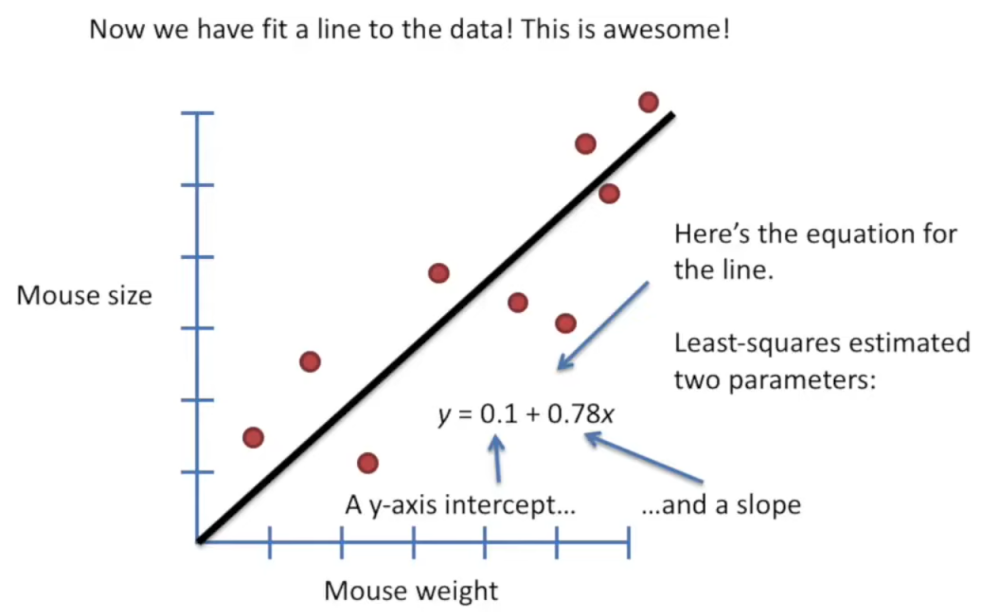

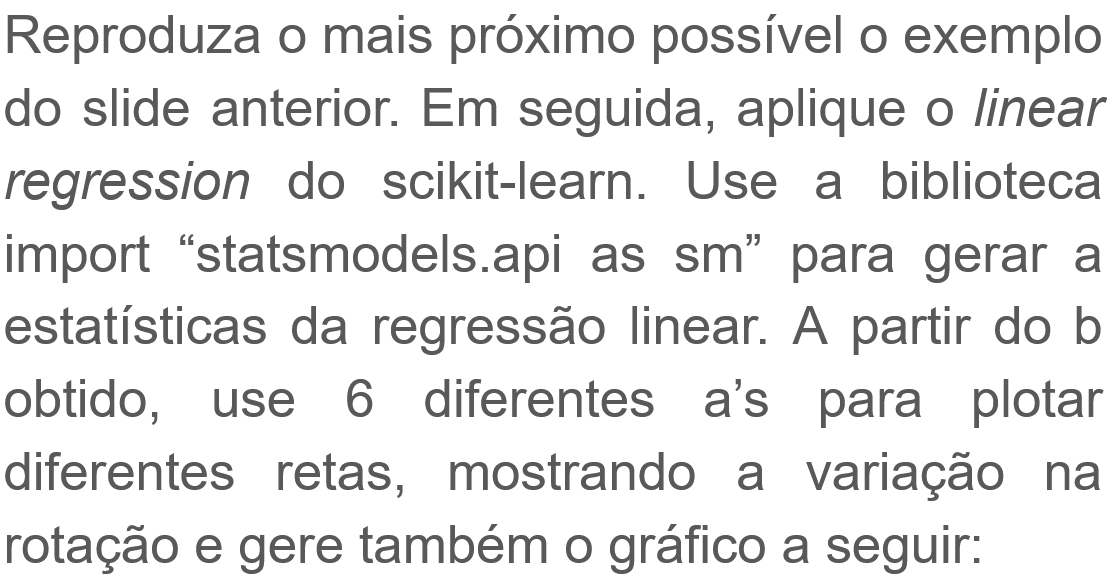

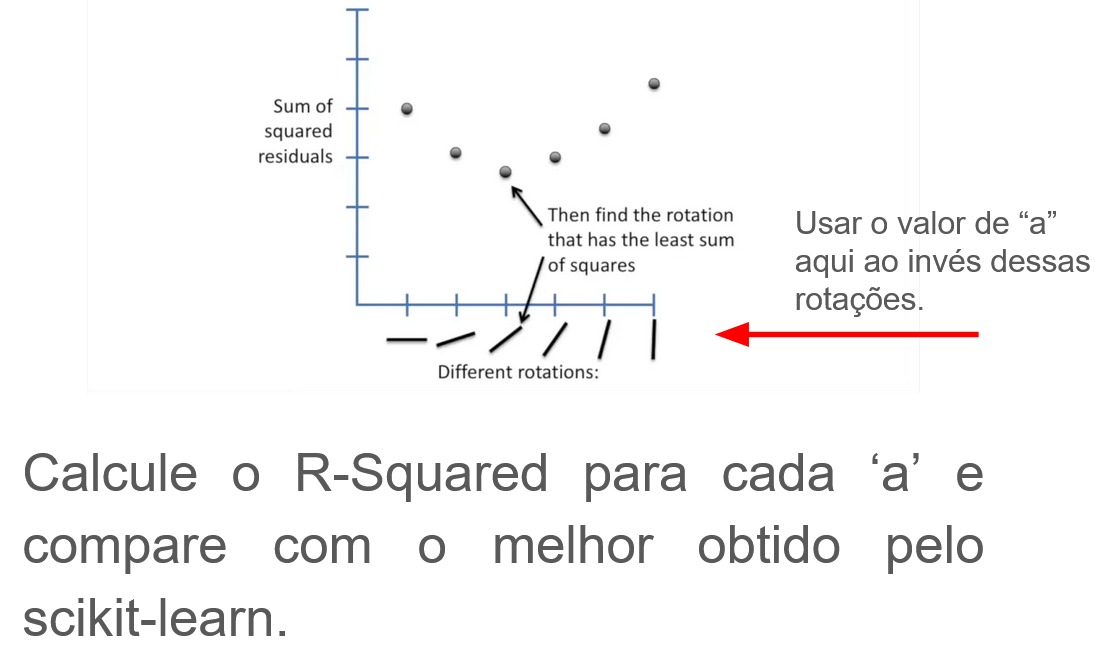

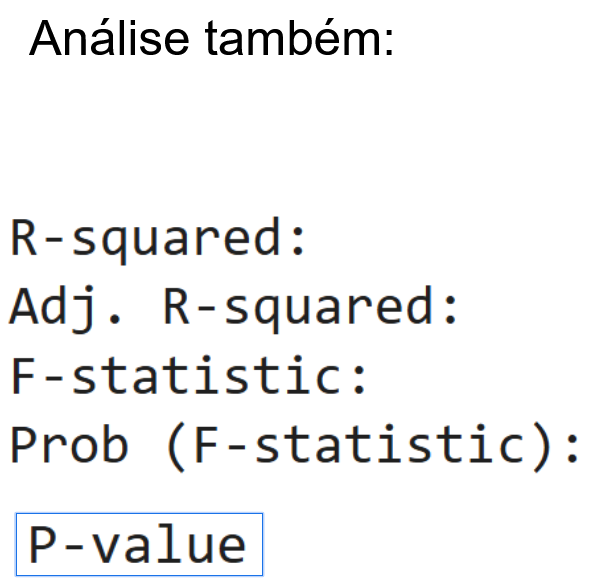

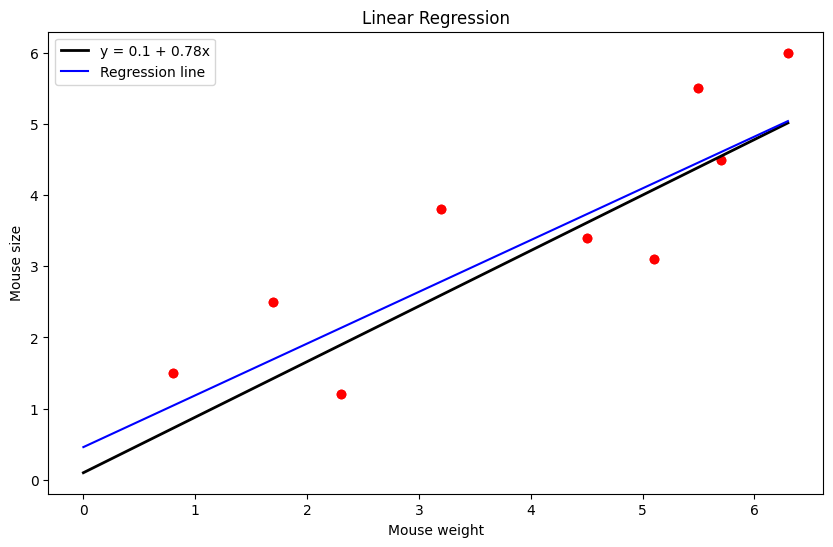

In [110]:
# Reproduza o mais próximo possível o exemplo do slide anterior.
# Em seguida, aplique o linear regression do scikit-learn.

X = np.array([0.8, 1.7, 2.3, 3.2, 4.5, 5.1, 5.7, 5.5, 6.3])
y = np.array([1.5, 2.5, 1.2, 3.8, 3.4, 3.1, 4.5, 5.5, 6])

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red')

# Equation for the line: y = 0.1 + 0.78x
x_linha = np.array([0, np.max(X)])
y_linha = 0.1 + 0.78 * x_linha
plt.plot(x_linha, y_linha, color='black', linewidth=2, label=f'y = 0.1 + 0.78x')

# Aplicando o linear regression do scikit-learn

# Reshape X para 2D array com uma feature
X_reshaped = X.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Using sklearn for Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Pontos da regression line
# Reshape X para 2D array com uma feature
x_regression_line = np.array([0, np.max(X)]).reshape(-1, 1)
y_regression_line = model.predict(x_regression_line)

# Visualization
plt.scatter(X, y, color='red')
plt.plot(x_regression_line, y_regression_line, color='blue', label='Regression line')
plt.title('Linear Regression')
plt.xlabel('Mouse weight')
plt.ylabel('Mouse size')
plt.legend()
plt.show()

In [111]:
# Use a biblioteca import “statsmodels.api as sm” para gerar a estatísticas da regressão linear.

X_train_sm = sm.add_constant(X_train)  # Add intercept manually
ols_model = sm.OLS(y_train, X_train_sm).fit()  # Ordinary Least Squares
print("\nStatsmodels Summary:")
print(ols_model.summary())

# Calculate R-squared
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("\nR-squared:", r2)

# Extract p-value for the slope
p_value = ols_model.pvalues[1]
print(f"\nP-value for the slope: {p_value}")


Statsmodels Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     14.42
Date:                Sat, 24 May 2025   Prob (F-statistic):             0.0127
Time:                        01:20:20   Log-Likelihood:                -8.2176
No. Observations:                   7   AIC:                             20.44
Df Residuals:                       5   BIC:                             20.33
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4599      0.8

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


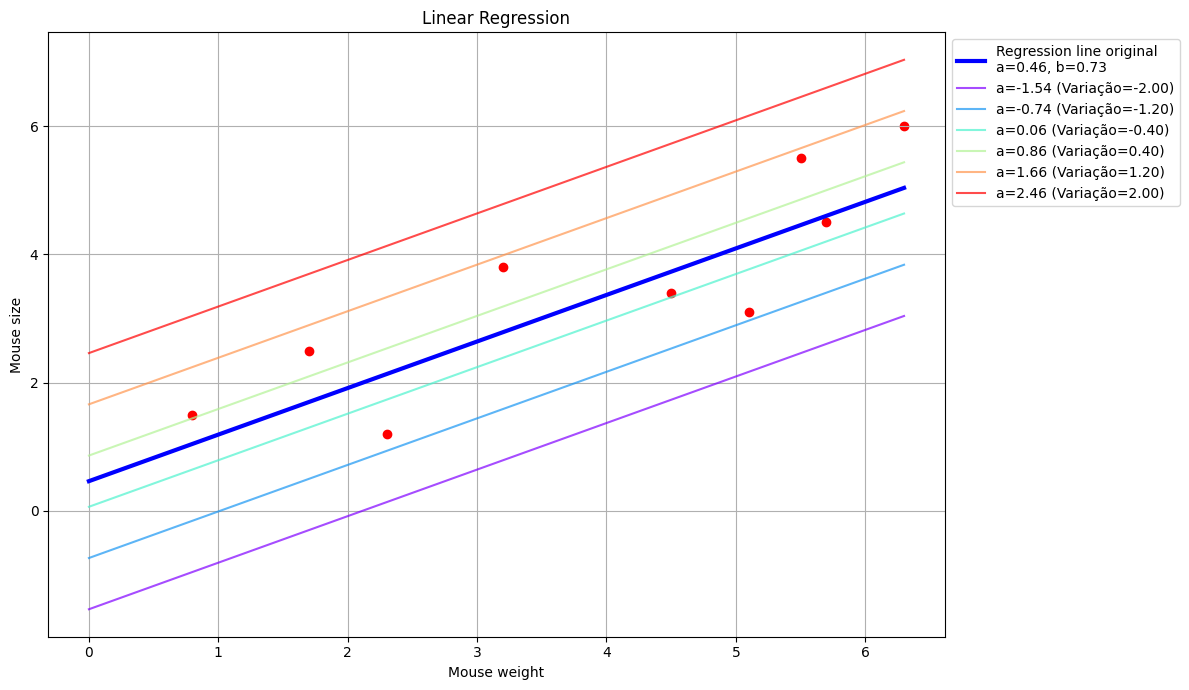

In [112]:
# A partir do b obtido, use 6 diferentes a’s para plotar diferentes retas, mostrando a variação na rotação.

# Coeficientes:
b = model.coef_[0]
a_original = model.intercept_

# Criando 6 diferentes a’s
a_novo = np.linspace(a_original - 2, a_original + 2, 6)

# Plotando
plt.figure(figsize=(12, 7))
plt.scatter(X, y, color='red')

# Regression line original
plt.plot(x_regression_line, y_regression_line, 'b-', linewidth=3,
         label=f'Regression line original\na={a_original:.2f}, b={b:.2f}')

# Criando 6 novas regression lines
colors = plt.cm.rainbow(np.linspace(0, 1, len(a_novo)))
for i, a in enumerate(a_novo):
  y_line = a + b * x_linha
  plt.plot(x_linha, y_line, color=colors[i], alpha=0.7, label=f'a={a:.2f} (Variação={a-a_original:.2f})')

plt.title(f'Linear Regression')
plt.xlabel('Mouse weight')
plt.ylabel('Mouse size')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

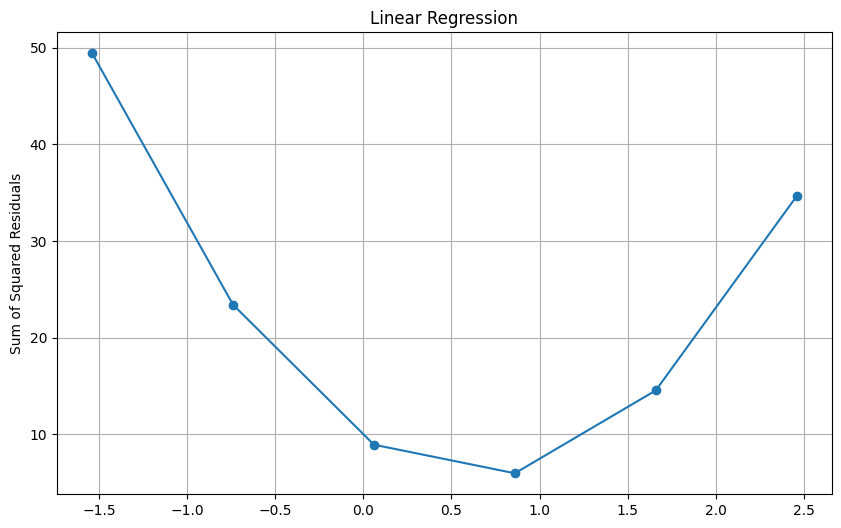

R² para diferentes valores de a:
Para a = -1.54 => R² = -1.2664
Para a = -0.74 => R² = -0.0740
Para a = 0.06 => R² = 0.5900
Para a = 0.86 => R² = 0.7255
Para a = 1.66 => R² = 0.3326
Para a = 2.46 => R² = -0.5888

R² do modelo do scikit-learn: 0.7238


In [117]:
# Calcule o R-Squared para cada ‘a’ e compare com o melhor obtido pelo scikit-learn.

sum_squared_residuals = []

for a in a_novo:
  y_pred = a + b * X
  residuals = y - y_pred
  sum_squared = np.sum(residuals ** 2)
  sum_squared_residuals.append(sum_squared)

plt.figure(figsize=(10, 6))
plt.plot(a_novo, sum_squared_residuals, marker='o')
plt.title('Linear Regression')
plt.ylabel('Sum of Squared Residuals')
plt.grid(True)
plt.show()

# R-Squared para cada 'a'
print("R² para diferentes valores de a:")
for a in a_novo:
    y_pred = a + b * X
    r2 = r2_score(y, y_pred)
    print(f"Para a = {a:.2f} => R² = {r2:.4f}")

# Melhor R² obtido pelo scikit-learn
y_pred_sklearn = model.predict(X_reshaped)
r2_sklearn = r2_score(y, y_pred_sklearn)
print(f"\nR² do modelo do scikit-learn: {r2_sklearn:.4f}")

In [118]:
# Analise também:
# Use a biblioteca import “statsmodels.api as sm” para gerar a estatísticas da regressão linear.

X_constante = sm.add_constant(X)
ols_model = sm.OLS(y, X_constante).fit()
print("\nStatsmodels Summary:")
print(ols_model.summary())

# Extract p-value for the slope
p_value = ols_model.pvalues[1]
print(f"\nP-value for the slope: {p_value}")


Statsmodels Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     20.05
Date:                Sat, 24 May 2025   Prob (F-statistic):            0.00288
Time:                        01:22:37   Log-Likelihood:                -10.669
No. Observations:                   9   AIC:                             25.34
Df Residuals:                       7   BIC:                             25.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6780      0.6

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)
